In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/artificial1d.csv', header=None, names=['x', 'y'])

In [4]:
df

,x,y
0,-1.000000,-2.082017
1,-0.931034,-1.326980
2,-0.862069,-1.105598
3,-0.793103,-0.873946
4,-0.724138,-0.285027
5,-0.655172,-0.431153
6,-0.586207,-0.794754
7,-0.517241,-0.886068
8,-0.448276,-0.899900
9,-0.379310,-0.861844


In [5]:
X = df['x'].values
y = df['y'].values

In [6]:
def calcular_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calcular_parametros_ols(X, y):
    n = len(X)
    mean_x = sum(X) / n
    mean_y = sum(y) / n
    numer = sum((X[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    denom = sum((X[i] - mean_x) ** 2 for i in range(n))
    slope = numer / denom
    intercept = mean_y - slope * mean_x
    return intercept, slope

intercept, slope = calcular_parametros_ols(X, y)

y_pred = [intercept + slope * x for x in X]

mse = calcular_mse(y, y_pred)

In [7]:
X_bias_gd = np.vstack([np.ones(len(X)), X]).T
X_bias_sgd = np.vstack([np.ones(len(X)), X]).T

learning_rate = 0.1
num_iterations = 100


def gradient_descent(X, y, learning_rate, num_iterations, sgd=False):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_function = []

    for _ in range(num_iterations):
        X_random = X
        y_random = y

        y_pred = np.dot(X_random, theta)
        error = y_pred - y_random
        gradient = (1/n_samples) * np.dot(X_random.T, error)
        theta -= learning_rate * gradient
        cost = calcular_mse(y, np.dot(X, theta))
        cost_function.append(cost)

    return theta, cost_function

def stochastic_gradient_descent(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_function = []

    for _ in range(num_iterations):
        random_index = np.random.randint(0, n_samples)
        X_random = X[random_index]
        y_random = y[random_index]

        y_pred = np.dot(X_random, theta)
        error = y_pred - y_random
        gradient = X_random * error
        theta -= learning_rate * gradient
        cost = calcular_mse(y, np.dot(X, theta))
        cost_function.append(cost)

    return theta, cost_function



theta_gd, cost_function_gd = gradient_descent(X_bias_gd, y, learning_rate, num_iterations)

theta_sgd, cost_function_sgd = stochastic_gradient_descent(X_bias_sgd, y, learning_rate, num_iterations)

Parâmetros do Modelo OLS:
Intercept (Beta0): 0.06761792463834028
Slope (Beta1): 1.5748651690368316
MSE: 0.21340090132936987


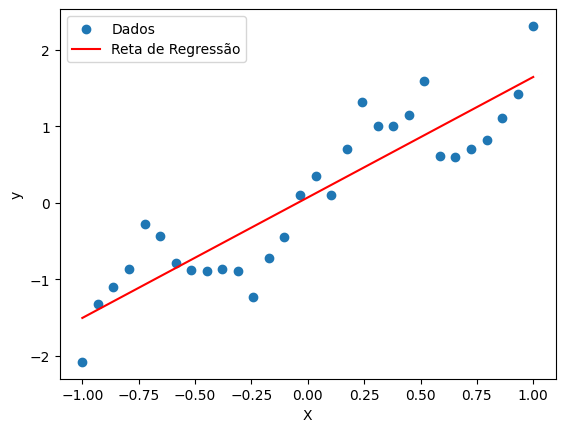

In [8]:
print("Parâmetros do Modelo OLS:")
print(f"Intercept (Beta0): {intercept}")
print(f"Slope (Beta1): {slope}")
print(f"MSE: {mse}")

plt.scatter(X, y, label="Dados")
plt.plot(X, y_pred, color='red', label="Reta de Regressão")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Parâmetros do Modelo (GD):
Intercept (Beta0): 0.06761612861167202
Slope (Beta1): 1.5330326325126253
MSE (GD): 0.2140244506943602


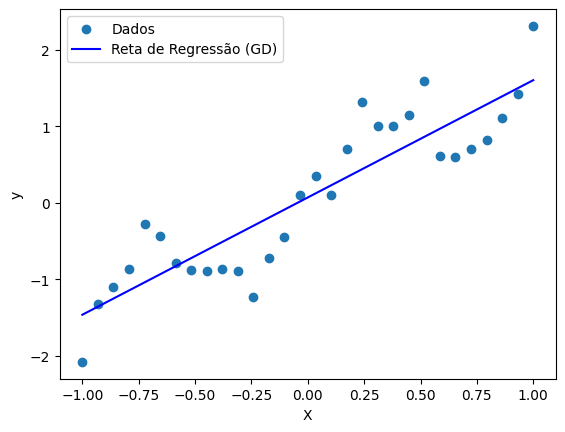

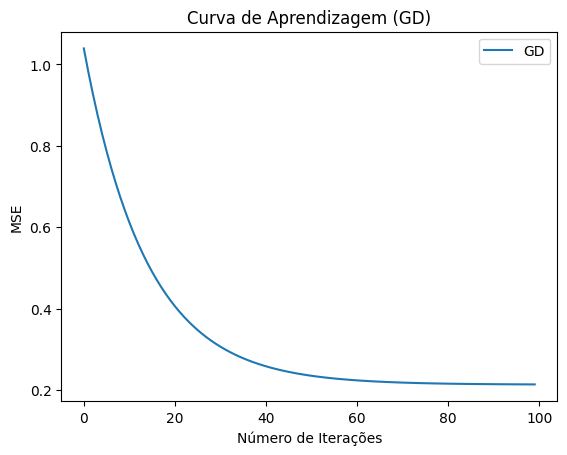

In [9]:
print("Parâmetros do Modelo (GD):")
print(f"Intercept (Beta0): {theta_gd[0]}")
print(f"Slope (Beta1): {theta_gd[1]}")
print(f"MSE (GD): {cost_function_gd[-1]}")

plt.scatter(X, y, label="Dados")
plt.plot(X, X_bias_gd.dot(theta_gd), color='blue', label="Reta de Regressão (GD)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

plt.plot(range(num_iterations), cost_function_gd, label="GD")
plt.xlabel("Número de Iterações")
plt.ylabel("MSE")
plt.title("Curva de Aprendizagem (GD)")
plt.legend()
plt.show()

Parâmetros do Modelo (SGD):
Intercept (Beta0): 0.09188057415679432
Slope (Beta1): 1.593056296452161
MSE: 0.21410749048660987


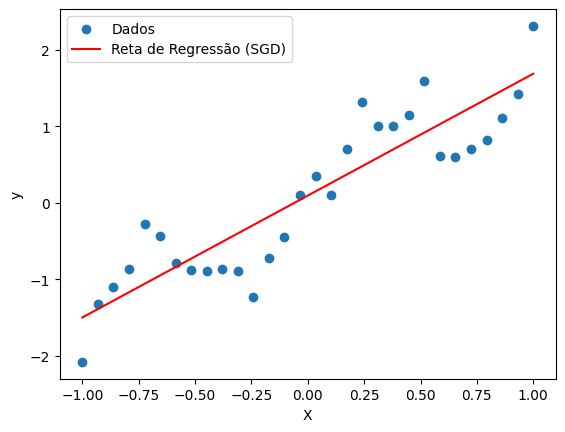

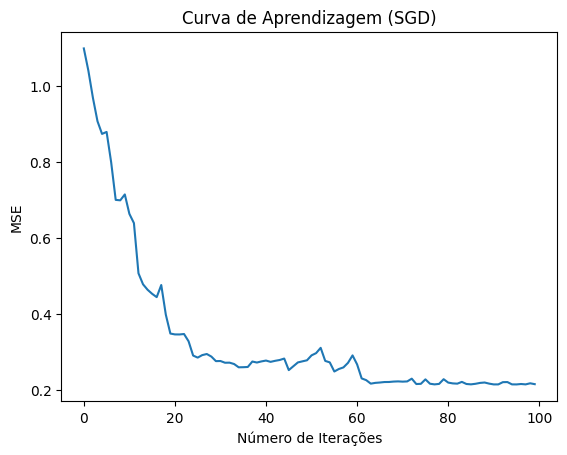

In [10]:
print("Parâmetros do Modelo (SGD):")
print(f"Intercept (Beta0): {theta_sgd[0]}")
print(f"Slope (Beta1): {theta_sgd[1]}")
print(f"MSE: {cost_function_sgd[-1]}")

plt.scatter(X, y, label="Dados")
plt.plot(X, X_bias_sgd.dot(theta_sgd), color='red', label="Reta de Regressão (SGD)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

plt.plot(range(num_iterations), cost_function_sgd)
plt.xlabel("Número de Iterações")
plt.ylabel("MSE")
plt.title("Curva de Aprendizagem (SGD)")
plt.show()